# Plot spatial sampling uncertainty results

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import seaborn as sns
import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

## Set Paths

In [2]:
# Set Paths
ROOT = Path("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/")
AUXDATA = Path(f"{ROOT}/aux_data")
RESULTS = Path(f"{ROOT}/results/")

## Set Config

In [3]:
wflow_calibrated_uncalibrated_csv = f'{RESULTS}/sampling_uncertainty_overview_wflow_calibrated_uncalibrated.csv'
wflow_calibrated_pcrglob_csv = f'{RESULTS}/sampling_uncertainty_overview_wflow_calibrated_pcr-globwb.csv'

basins_shp = f"{AUXDATA}/CAMELS-GB/data/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"

## Load dataframes

In [4]:
df_wflow_calibrated_uncalibrated = pd.read_csv(wflow_calibrated_uncalibrated_csv, index_col='basin_id')
df_calibrated_pcrglob = pd.read_csv(wflow_calibrated_pcrglob_csv, index_col='basin_id')

## Read basin boundary shapefile

In [5]:
# Read shapefile
gdf = gpd.read_file(basins_shp)
gdf = gdf.set_index('ID_STRING')
gdf.index = gdf.index.astype(int)

# Reproject shapefile
gdf = gdf.to_crs({'init':'epsg:4326'})
gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")

/home/jaerts/miniconda3/envs/wflow_state_flux/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/scratch-local/jaerts.2598960/ipykernel_3619018/1606819374.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")


## Merge shapefile and dataframes

In [6]:
# Merge results and shapefile
gdf_wflow_calibrated_uncalibrated = gdf.merge(df_wflow_calibrated_uncalibrated, left_index=True, right_index=True, how="inner")
gdf_wflow_pcrglob = gdf.merge(df_calibrated_pcrglob, left_index=True, right_index=True, how="inner")

gdf_wflow_calibrated_uncalibrated = gdf_wflow_calibrated_uncalibrated.set_geometry("centroid")
gdf_wflow_pcrglob = gdf_wflow_pcrglob.set_geometry("centroid")

# Plot all combinations sampling uncertainty vs objective function difference

/scratch-local/jaerts.2598960/ipykernel_3619018/3964172547.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(yticks)
/scratch-local/jaerts.2598960/ipykernel_3619018/3964172547.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(yticks)
/scratch-local/jaerts.2598960/ipykernel_3619018/3964172547.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(yticks)
/scratch-local/jaerts.2598960/ipykernel_3619018/3964172547.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(yticks)


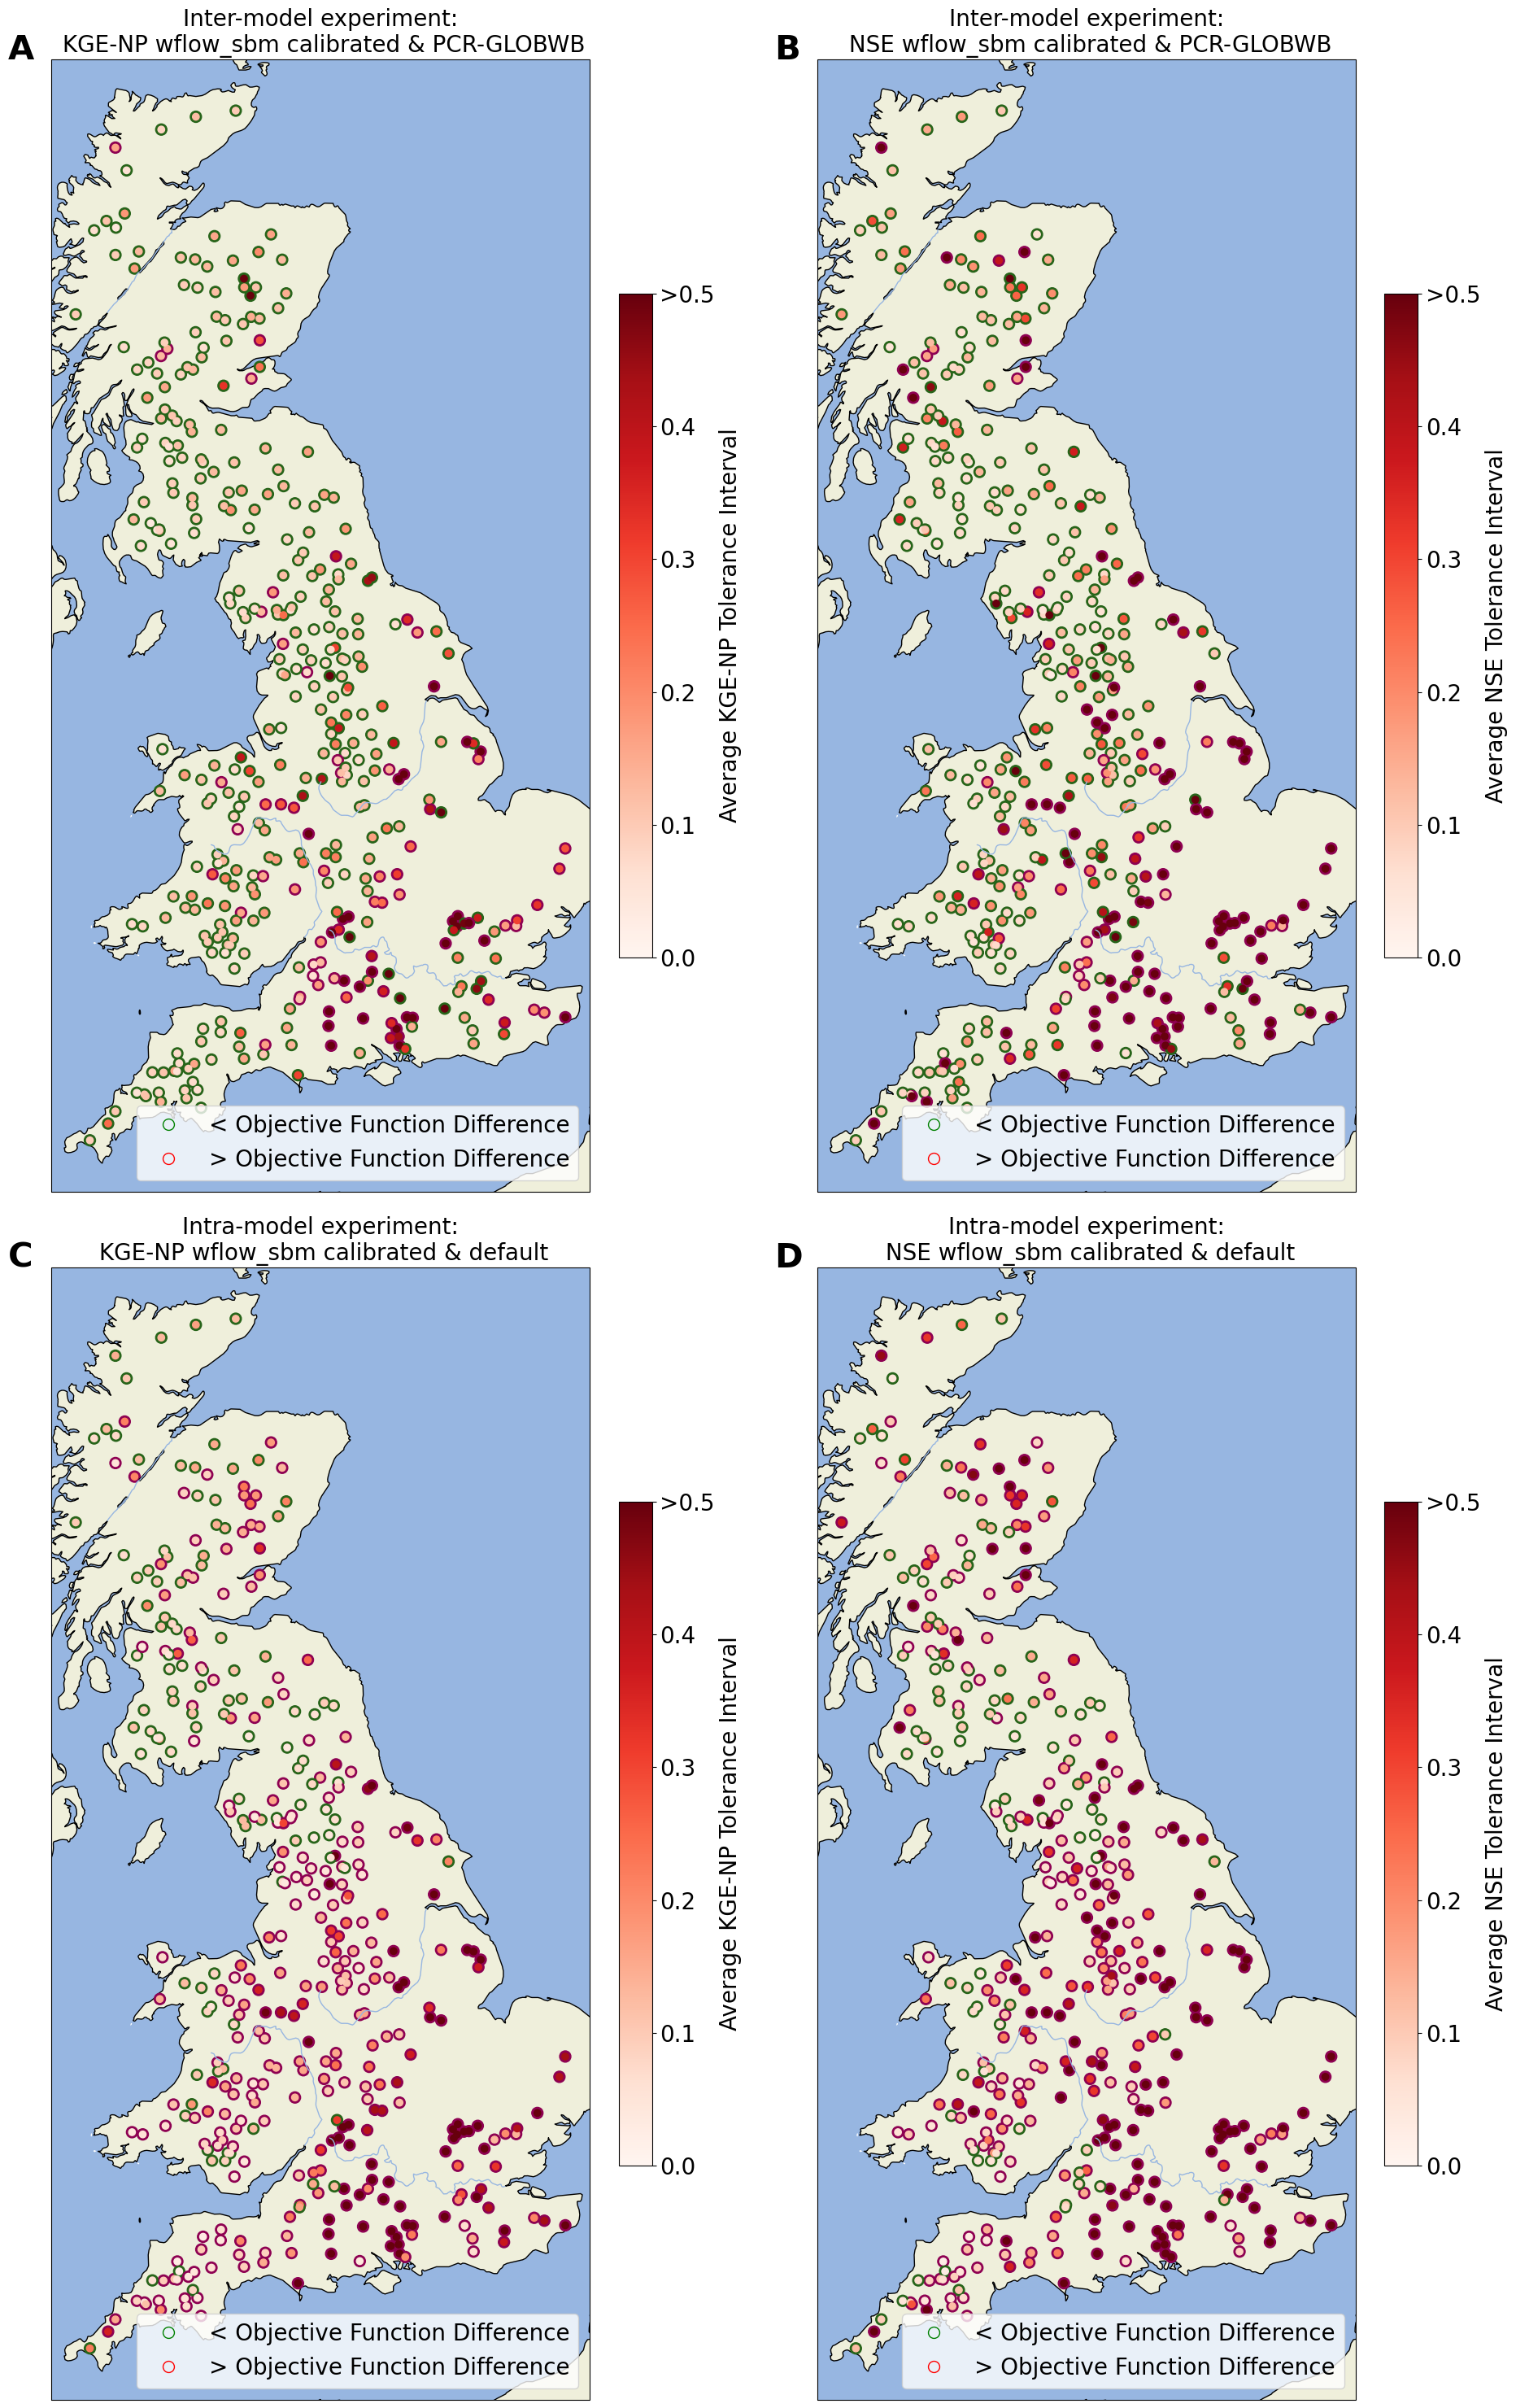

In [8]:
matplotlib.rcParams.update({'font.size': 20})

# Add custom legend
yellow_patch = mpatches.Patch(color='red', label='> Model Difference')
green_patch = mpatches.Patch(color='Green', label='< Model Difference')

green_marker = mlines.Line2D([], [], color='green', marker='o', markerfacecolor="None", linestyle='None',
                          markersize=10, label='< Objective Function Difference')
red_marker = mlines.Line2D([], [], color='red', marker='o', markerfacecolor="None", linestyle='None',
                          markersize=10, label='> Objective Function Difference')

colormap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Plot maps
fig, axes = plt.subplots(2, 2,figsize=(20, 30), subplot_kw={"projection": ccrs.PlateCarree()})

# wflow pcrglob KGE
axes[0,0] = gdf_wflow_pcrglob.plot(ax=axes[0,0], column='kge_tolerance_LT_objective',
                                  cmap='PiYG_r',
                                  legend=False,
                                  marker='o',
                                  facecolors='None',
                                  markersize=100)


axes[0,0] = gdf_wflow_pcrglob.plot(ax=axes[0,0], column='kge_average_tolerance',
                                    legend=True,
                                    vmin = 0.0,
                                    vmax = 0.5,
                                    cmap='Reds',
                                    legend_kwds={'label': "Average KGE-NP Tolerance Interval",
                                                 'orientation': "vertical",
                                                  "fraction":0.046,
                                                     "pad":0.04})

# wflow pcrglob NSE
axes[0,1] = gdf_wflow_pcrglob.plot(ax=axes[0,1], column='nse_tolerance_LT_objective',
                                  cmap='PiYG_r',
                                  legend=False,
                                  marker='o',
                                  facecolors='None',
                                  markersize=100)


axes[0,1] = gdf_wflow_pcrglob.plot(ax=axes[0,1], column='nse_average_tolerance',
                                    legend=True,
                                    vmin = 0.0,
                                    vmax = 0.5,
                                    cmap='Reds',
                                    legend_kwds={'label': "Average NSE Tolerance Interval",
                                                 'orientation': "vertical",
                                                  "fraction":0.046,
                                                     "pad":0.04})

# wflow wflow KGE
axes[1,0] = gdf_wflow_calibrated_uncalibrated.plot(ax=axes[1,0], column='kge_tolerance_LT_objective',
                                                  cmap='PiYG_r',
                                                  legend=False,
                                                  marker='o',
                                                  facecolors='None',
                                                  markersize=100)


axes[1,0] = gdf_wflow_calibrated_uncalibrated.plot(ax=axes[1,0], column='kge_average_tolerance',
                                                    legend=True,
                                                    vmin = 0.0,
                                                    vmax = 0.5,
                                                    cmap='Reds',
                                                    legend_kwds={'label': "Average KGE-NP Tolerance Interval",
                                                                 'orientation': "vertical",
                                                                  "fraction":0.046,
                                                                     "pad":0.04})

# wflow wflow NSE
axes[1,1] = gdf_wflow_calibrated_uncalibrated.plot(ax=axes[1,1], column='nse_tolerance_LT_objective',
                                                  cmap='PiYG_r',
                                                  legend=False,
                                                  marker='o',
                                                  facecolors='None',
                                                  markersize=100)


axes[1,1] = gdf_wflow_calibrated_uncalibrated.plot(ax=axes[1,1], column='nse_average_tolerance',
                                                    legend=True,
                                                    vmin = 0.0,
                                                    vmax = 0.5,
                                                    cmap='Reds',
                                                    legend_kwds={'label': "Average NSE Tolerance Interval",
                                                                 'orientation': "vertical",
                                                                  "fraction":0.046,
                                                                     "pad":0.04})

# Set Basemap
axes[0,0].add_feature(cartopy.feature.OCEAN)
axes[0,0].add_feature(cartopy.feature.LAND, edgecolor='black')
axes[0,0].add_feature(cartopy.feature.LAKES, edgecolor='black')
axes[0,0].add_feature(cartopy.feature.RIVERS)

axes[0,1].add_feature(cartopy.feature.OCEAN)
axes[0,1].add_feature(cartopy.feature.LAND, edgecolor='black')
axes[0,1].add_feature(cartopy.feature.LAKES, edgecolor='black')
axes[0,1].add_feature(cartopy.feature.RIVERS)

axes[1,0].add_feature(cartopy.feature.OCEAN)
axes[1,0].add_feature(cartopy.feature.LAND, edgecolor='black')
axes[1,0].add_feature(cartopy.feature.LAKES, edgecolor='black')
axes[1,0].add_feature(cartopy.feature.RIVERS)

axes[1,1].add_feature(cartopy.feature.OCEAN)
axes[1,1].add_feature(cartopy.feature.LAND, edgecolor='black')
axes[1,1].add_feature(cartopy.feature.LAKES, edgecolor='black')
axes[1,1].add_feature(cartopy.feature.RIVERS)

# Set text
axes[0,0].text(-0.08,1, string.ascii_uppercase[0], transform=axes[0,0].transAxes, 
            size=30, weight='bold')
axes[0,1].text(-0.08,1, string.ascii_uppercase[1], transform=axes[0,1].transAxes, 
            size=30, weight='bold')
axes[1,0].text(-0.08,1, string.ascii_uppercase[2], transform=axes[1,0].transAxes, 
            size=30, weight='bold')
axes[1,1].text(-0.08,1, string.ascii_uppercase[3], transform=axes[1,1].transAxes, 
            size=30, weight='bold')

# Set Legend
yticks = [0.0, 0.1, 0.2, 0.3, 0.4, '>0.5']

colourbar = axes[0,0].get_figure().get_axes()[4]
colourbar.get_yticks()
colourbar.set_yticklabels(yticks)

colourbar = axes[0,1].get_figure().get_axes()[5]
colourbar.get_yticks()
colourbar.set_yticklabels(yticks)

colourbar = axes[1,0].get_figure().get_axes()[6]
colourbar.get_yticks()
colourbar.set_yticklabels(yticks)

colourbar = axes[1,1].get_figure().get_axes()[7]
colourbar.get_yticks()
colourbar.set_yticklabels(yticks)

axes[0,0].legend(handles=[green_marker,red_marker])
axes[0,1].legend(handles=[green_marker,red_marker])
axes[1,0].legend(handles=[green_marker,red_marker])
axes[1,1].legend(handles=[green_marker,red_marker])

# Set Title
axes[0,0].set_title('Inter-model experiment:\n KGE-NP wflow_sbm calibrated & PCR-GLOBWB', size=20)
axes[0,1].set_title('Inter-model experiment:\n NSE wflow_sbm calibrated & PCR-GLOBWB', size=20)
axes[1,0].set_title('Intra-model experiment:\n KGE-NP wflow_sbm calibrated & default', size=20)
axes[1,1].set_title('Intra-model experiment:\n NSE wflow_sbm calibrated & default', size=20)

plt.tight_layout()
plt.savefig(f'{ROOT}/plots/fig_spatial_comparison_sampling_uncertainty.png', bbox_inches='tight', dpi=300)